# Phys555 Assignment 2 Question 2
Karlee Zammit - V00823093

## Linear Regression and KNN

Q2 - Use  the Q1 regression data set for the following:
A) Use the linear regression model in the module 'Class04-Jan19.' Change the hyperparameters to get the best predictions. Explain the details and discuss the accuracy/performance of the model (i.e., associated plots and metrics). 
B) Do the same with KNN regression. What is the best K for your data? Which model (A or B) is more accurate (higher performance)?

In [1]:
# Import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
print('Done!')

Done!


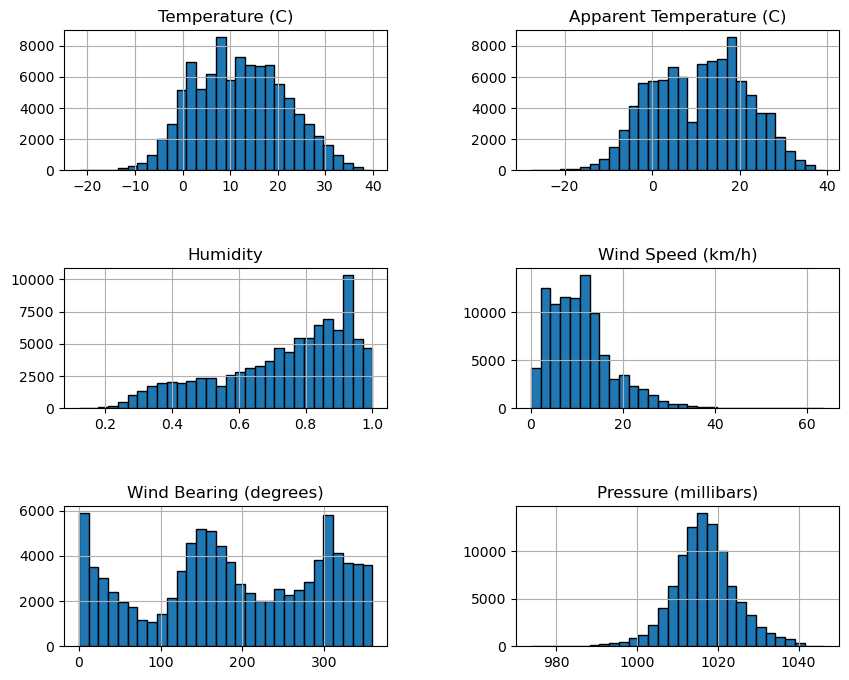

In [2]:
# Read in the csv data and perform the same data mining steps as was done in question 1
weather = pd.read_csv(r'weatherHistory.csv', delimiter=',')
weather=weather.dropna(axis=0)
weather = weather.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Precip Type', 'Loud Cover', 'Visibility (km)'], axis=1)
weather_mined = weather.loc[ weather['Pressure (millibars)'] != 0]
weather_mined = weather_mined.loc[weather_mined['Humidity'] != 0]
weather_mined.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [3]:
# Set temperature as the target variable
var = ['Temperature (C)']

# Drop temperature out of the weather data, and set it as X
X = weather_mined.loc[:, weather_mined.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = weather_mined[var].copy()
print(Y.columns)

# Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

# Print the shape of the split data
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')
Index(['Temperature (C)'], dtype='object')
training set ==  (70969, 5) (70969,) ,, validation set ==  (23657, 5) (23657,)


Text(0.5, 0, 'X3')

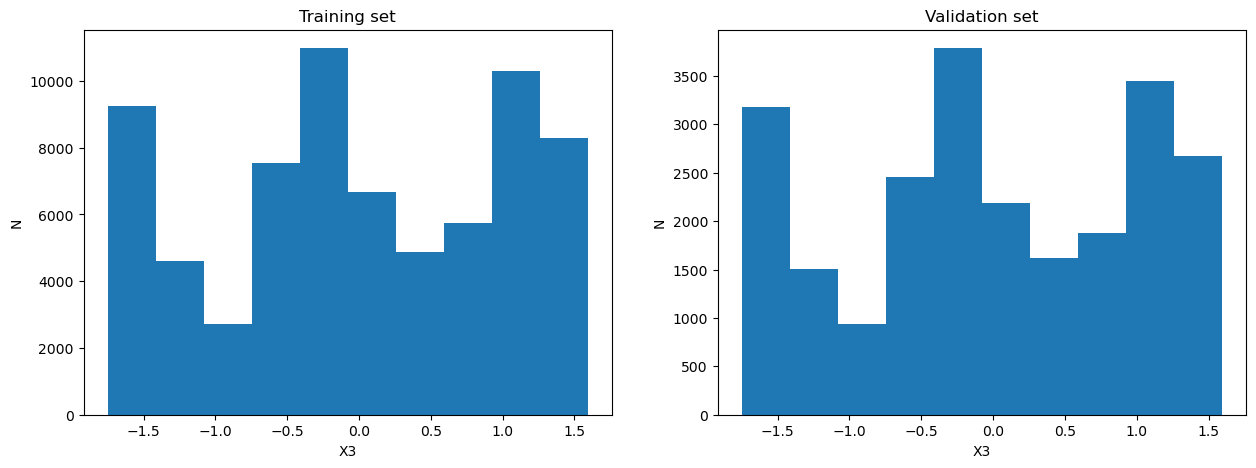

In [4]:
# Normalize the data
# Note the scaler is fit on the training data, and the validation dating is normalized based on the fit of the training data
# This is to ensure the training and validation sets are comparable 
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

# Plot column 4 as an example to display normalized data
# I scanned through all variables to ensure 
n_column = 3

# Plot a figure of the normalized training and validation set to ensure they represent the same distribution and spread
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(X_tr_Norm[:,n_column])
plt.title('Training set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

plt.subplot(1, 2, 2)
plt.hist(X_va_Norm[:,n_column])
plt.title('Validation set')
plt.ylabel('N')
plt.xlabel("X"+str(n_column))

Text(0.5, 1.0, 'Linear Regression')

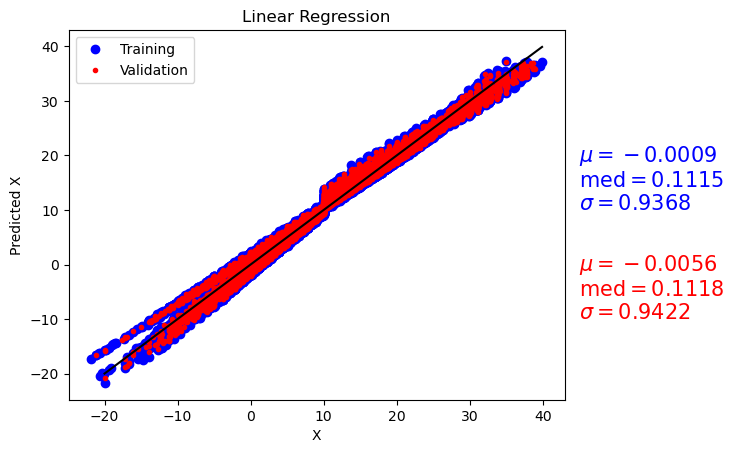

In [5]:
# Initalize a linear regression model 
reg = linear_model.SGDRegressor(loss='squared_error', penalty='L2', alpha=0.001,
                               max_iter=200, eta0=.0001, tol=0.0001, learning_rate='constant', n_iter_no_change=2)

# reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.01, l1_ratio=0.15, 
#                                         fit_intercept=True, max_iter=100, tol=0.000001, shuffle=True, verbose=0, 
#                                         epsilon=0.1, random_state=None, learning_rate='constant', eta0=.001, 
#                                         power_t=0.25, early_stopping=False, validation_fraction=0.1, 
#                                         n_iter_no_change=5, warm_start=False, average=False)

# Fit the linear regression model on the normalized data
reg.fit(X_tr_Norm,Y_tr)

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)

# Plot the results of linear regression along with their statistics
plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

# Plot a straight line overtop of the data
plt.plot(np.arange(-20,40,.1),  np.arange(-20,40,.1),'-k')
plt.xlabel('X')
plt.ylabel('Predicted X')
plt.legend(['Training', 'Validation'], loc='best')

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)

plt.text(45,10,textstr, color='b',fontsize=15)
plt.text(45,-10,textstrv, color='r',fontsize=15)
plt.title('Linear Regression')

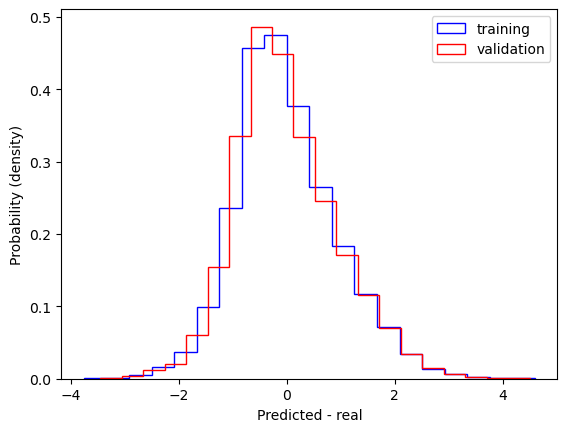

In [6]:
plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
plt.xlabel('Predicted - real')
plt.ylabel('Probability (density)')
plt.legend()

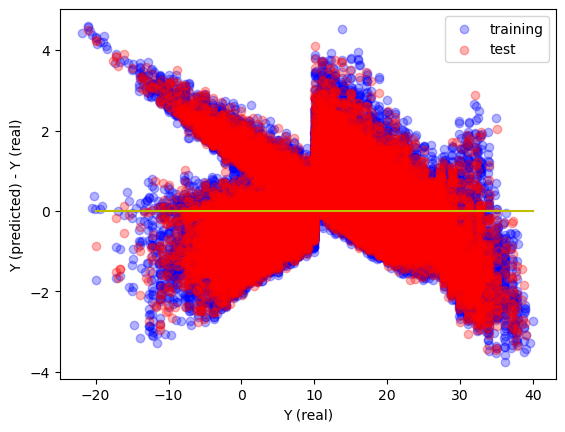

In [7]:
plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-20,40],[0,0],'y')
#plt.ylim([-1,1])
plt.legend()

Text(0.5, 1.0, 'KNN Regression')

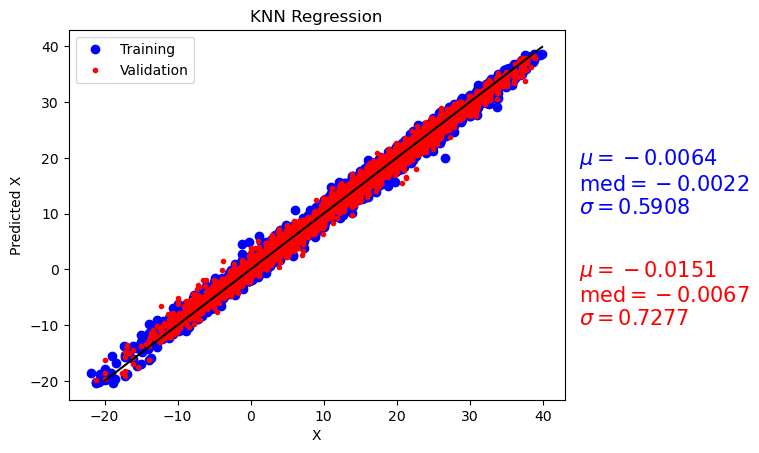

In [8]:
# KNN

# Initialize KNN nearest neighbour regressor
reg = KNeighborsRegressor(n_neighbors=5)  # set the hyperparameters

# Fit the regression model on the normalized data
reg.fit(X_tr_Norm,Y_tr)  # train it

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)

# Plot the results
plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(-20,40,.1),  np.arange(-20,40,.1),'-k')
plt.xlabel('X')
plt.ylabel('Predicted X')
plt.legend(['Training', 'Validation'])
# plt.xlim([0,2])
# plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)

plt.text(45,10,textstr, color='b',fontsize=15)
plt.text(45,-10,textstrv, color='r',fontsize=15)
plt.title('KNN Regression')

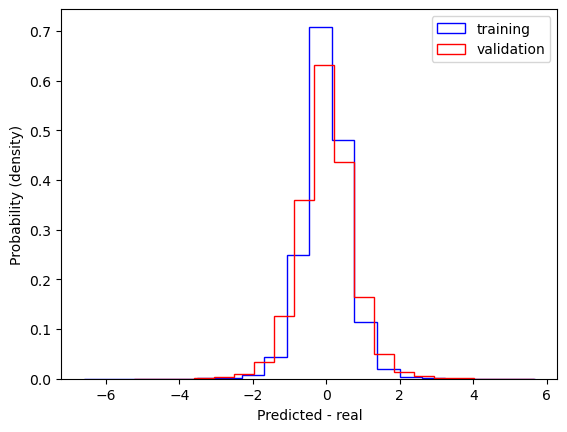

In [9]:
plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
plt.xlabel('Predicted - real')
plt.ylabel('Probability (density)')
plt.legend()


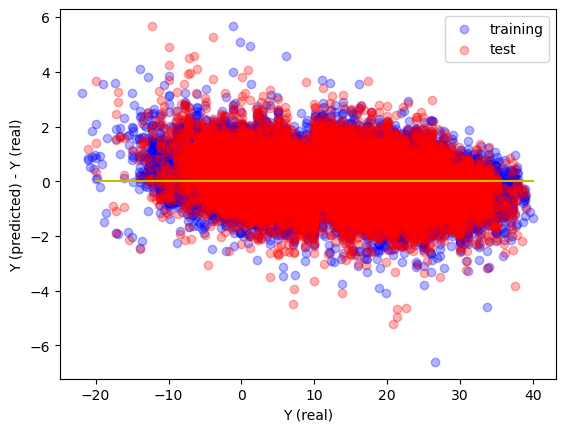

In [10]:
plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
plt.xlabel('Y (real)')
plt.ylabel('Y (predicted) - Y (real)')
plt.plot([-20,40],[0,0],'y')
#plt.ylim([-1,1])
plt.legend()

## References

Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

https://www.kaggle.com/datasets/budincsevity/szeged-weather
